**Importing the Library**

In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.cluster import MeanShift, estimate_bandwidth

**Importing data from folder and store it into data frame**

In [71]:
df=pd.read_csv("cheese.csv")

**Exploratory Data Analysis**

**Check the top 5 sample of the data frame , even we can check more by entering head(value), but by default it is 5**

In [72]:
df.head()

,Unnamed: 0,RETAILER,VOLUME,DISP,PRICE
0,1,LOS ANGELES - LUCKY,21374,0.162000,2.578460
1,2,LOS ANGELES - RALPHS,6427,0.124113,3.727867
2,3,LOS ANGELES - VONS,17302,0.102000,2.711421
3,4,CHICAGO - DOMINICK,13561,0.027591,2.651206
4,5,CHICAGO - JEWEL,42774,0.090613,1.986674


**We can find the shape of the dataset**

In [73]:
df.shape
df.size

(5555, 5)

27775

**By describing the data we can easily get the below information**

In [74]:
df.describe()

,Unnamed: 0,VOLUME,DISP,PRICE
count,5555.000000,5555.000000,5555.000000,5555.000000
mean,2778.000000,4771.243744,0.114277,2.868823
std,1603.734704,5967.917635,0.162289,0.531717
min,1.000000,231.000000,0.000000,1.319907
25%,1389.500000,1989.500000,0.000000,2.457262
50%,2778.000000,3408.000000,0.047368,2.703250
75%,4166.500000,5519.500000,0.166000,3.203279
max,5555.000000,148109.000000,1.000000,4.641757


**Find the data type**

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 5 columns):
Unnamed: 0    5555 non-null int64
RETAILER      5555 non-null object
VOLUME        5555 non-null int64
DISP          5555 non-null float64
PRICE         5555 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 217.1+ KB


**As we can see from above data Retailer is the object type and it is categorical variable**

In [76]:
df_pivot = pd.pivot_table(df, values = ['VOLUME', 'DISP','PRICE'], index = 'RETAILER', aggfunc = np.median)
df_pivot.head(10)
df_pivot.shape

,DISP,PRICE,VOLUME
RETAILER,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0
ATLANTA - KROGER CO,0.030872,2.701700,4455.0
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0
BALTI/WASH - SUPER FRESH,0.000000,3.823861,1132.5
BIRMINGHAM/MONTGOM - BRUNOS,0.202000,2.365171,10238.0
BIRMINGHAM/MONTGOM - KROGER,0.000000,2.386604,1948.5
BIRMINGHAM/MONTGOM - WINN DIXIE,0.026909,2.297595,5206.0


(88, 3)

**Scaled the feature by min max scaler in feature range 0,1 then transform it**

In [77]:
scld = MinMaxScaler(feature_range=(0,1))
arr_scld = scld.fit_transform(df_pivot)
df_scld = pd.DataFrame(arr_scld, columns = df_pivot.columns)
df_scld.shape

(88, 3)

In [78]:
df_scld.head()

,DISP,PRICE,VOLUME
0,0.000000,0.318908,0.017176
1,0.073857,0.250296,0.285807
2,0.000000,0.246355,0.170320
3,0.000000,0.705388,0.277327
4,0.000000,0.790969,0.241035


In [79]:
df_scld.describe()

,DISP,PRICE,VOLUME
count,88.000000,88.000000,88.000000
mean,0.201006,0.337239,0.252149
std,0.234245,0.214843,0.204063
min,0.000000,0.000000,0.000000
25%,0.000000,0.173638,0.105704
50%,0.099057,0.254668,0.217822
75%,0.343301,0.456079,0.326105
max,1.000000,1.000000,1.000000


**Find the number of clusters using elbow method**

In [80]:
num_of_clusters = range (2,10)
sse = []

for num_clusters in num_of_clusters:
  clusters = KMeans(num_clusters)
  clusters.fit(df_scld)
  sse.append(clusters.inertia_/100)

df_clusters = pd.DataFrame({'Cluster Numbers':num_of_clusters, 'Error_Term':sse})

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [81]:
df_clusters

,Cluster Numbers,Error_Term
0,2,0.087082
1,3,0.063365
2,4,0.044077
3,5,0.036159
4,6,0.031035
5,7,0.026707
6,8,0.023180
7,9,0.020343


**Elbow method**

In [82]:
elbo_sse_ = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k).fit(df_scld)
    elbo_sse_.append([k, kmeans.inertia_])

In [83]:
elbo_sse_

[[1, 12.412280133757523],
 [2, 8.7082084423361668],
 [3, 6.3365045138896239],
 [4, 4.4076563702701295],
 [5, 3.5924375452480808],
 [6, 3.0696607301545482],
 [7, 2.6443575784664208]]

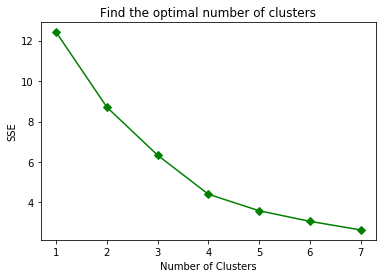

In [84]:
plt.plot(pd.DataFrame(elbo_sse_)[0], pd.DataFrame(elbo_sse_)[1],marker = "D", color='green');
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of clusters')
plt.show();

**Silhouette Analysis**

In [85]:
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_scld)
    sse_.append([k, silhouette_score(df_scld, kmeans.labels_)])

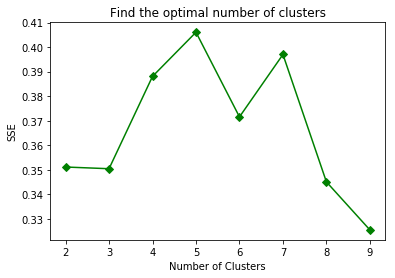

In [86]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1],marker = "D", color='green');
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of clusters')
plt.show();

In [87]:
clusters = KMeans(4)
clusters.fit(df_scld)
clusters.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([2, 2, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 0, 0, 3, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 3, 1, 0, 0, 2, 2, 2, 3, 0, 1, 2, 2,
       3, 3, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2,
       2, 0, 0, 3, 0, 0, 1, 0, 2, 0, 1, 3, 1, 2, 0, 2, 2, 2, 1])

In [88]:
df_pivot['Cluster'] = clusters.labels_
df_pivot.head()

,DISP,PRICE,VOLUME,Cluster
RETAILER,,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0,2
ATLANTA - KROGER CO,0.030872,2.701700,4455.0,2
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0,2
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0,1
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0,1


In [89]:
df_pivot.tail()

,DISP,PRICE,VOLUME,Cluster
RETAILER,,,,
SYRACUSE - WEGMANS,0.227423,3.459383,807.0,0
TAMPA/ST. PETE - KASH N KARRY,0.000000,2.877614,3797.0,2
TAMPA/ST. PETE - PUBLIX,0.036500,2.769338,5021.0,2
TAMPA/ST. PETE - WINN DIXIE,0.014416,2.599700,5169.0,2
WICHITA - DILLON COMPANIES,0.000000,3.378888,1187.5,1


In [90]:
clust_profile = pd.pivot_table(df_pivot, values = ['VOLUME', 'DISP','PRICE'], index = 'Cluster', aggfunc = np.mean)
np.round(clust_profile,2)
df_pivot.groupby('Cluster').size()

,DISP,PRICE,VOLUME
Cluster,,,
0,0.24,2.77,3463.58
1,0.05,3.56,3042.00
2,0.03,2.62,3374.33
3,0.08,2.75,10864.50


Cluster
0    18
1    23
2    39
3     8
dtype: int64